![Institute of Coding](assets/header.png)


# Visualization of workforce jobs for professional, scientific and technical activities across regions

In the second episode of data visualization for everyone series, we'll use Plot.ly for Python visualization library. Plot.ly provides interactive and nice-looking visualizations for Python, MATLAB, R, and JS. We'll use Python for the rest of the notebook, to be consistent with previous episode.

We'll visualize number of jobs across regions in UK, specifically **Professional, scientific, and technical activity** jobs. You can download this data or similar statistics from [here](https://www.nomisweb.co.uk/query/construct/summary.asp?mode=construct&version=0&dataset=130).

We cleaned up the header from the data and for the future reference, the header is as follows:

```
Workforce jobs by industry (SIC 2007) - seasonally adjusted	
ONS Crown Copyright Reserved	
Analysis   :	standard
Industry   :	M : Professional, scientific and technical activities
Item Name  :	total workforce jobs
Reference  :	https://www.nomisweb.co.uk/query/construct/
            	summary.asp?mode=construct&version=0&dataset=130
```

You can download cleaned-up data in a CSV format, which we'll be using throughout this notebook [here](#).

# Loading Data
First, we need to read the CSV file, using the pandas library, just like we did on the previous notebook.

In [1]:
import pandas as pd

df = pd.read_csv("jobs.csv")

Let's preview the data.

In [2]:
df.tail()

,Date,East,East Midlands,London,North East,North West,Northern Ireland,Scotland,South East,South West,Wales,West Midlands,Yorkshire and The Humber
19,March 2015,263044,163039,753700,75443,293052,39562,190611,432329,238520,72977,195420,173415
20,March 2016,277624,162464,788461,85517,305256,37344,207532,463102,217122,72170,202833,187615
21,March 2017,286329,157806,829812,65403,302250,38155,196561,440078,224186,74490,215548,197930
22,March 2018,292895,150110,792677,67874,279243,46213,206881,395901,221016,89701,234002,208884
23,March 2019,318687,156671,842619,56237,298771,44113,213631,443117,257923,88120,212209,198537


Import the plotly library and initialize for using with jupyter notebook.

In [3]:
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objects as go

init_notebook_mode(connected=True)

# Visualizing the Data

We'll use scatter plot visualization using `go.Scatter` module. 

We'll plot `Date` column in `x` axis, and *North East* column in the `y` axis. 

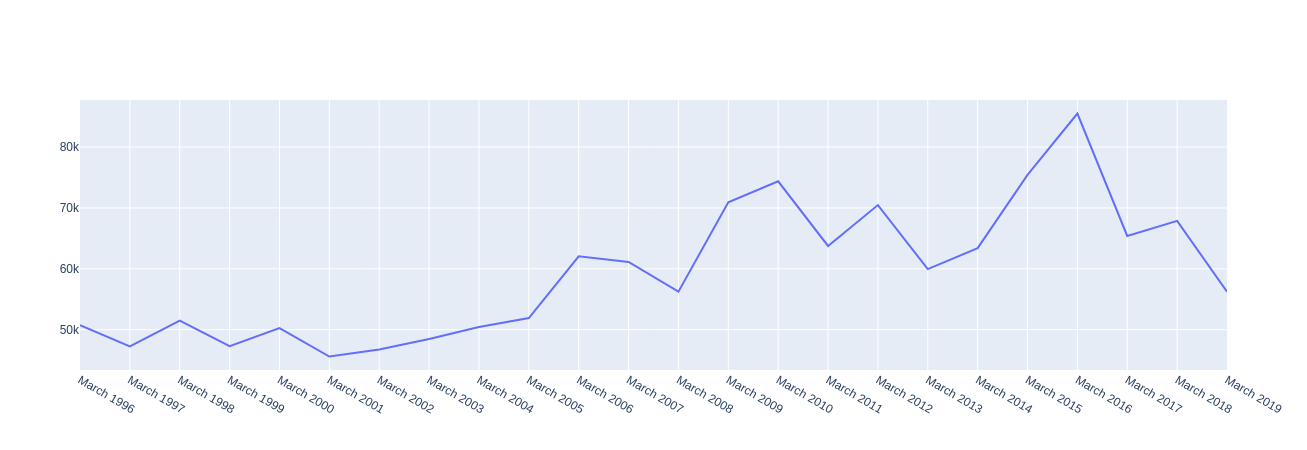

In [4]:
fig = go.Figure(data=go.Scatter(x=df["Date"], y=df["North East"]))
iplot(fig)

Let's add circle markers on the line to improve the appearance of the visualization. To do that, we can specify `mode` parameter as `lines+markers` where the previous value was `lines` as default.

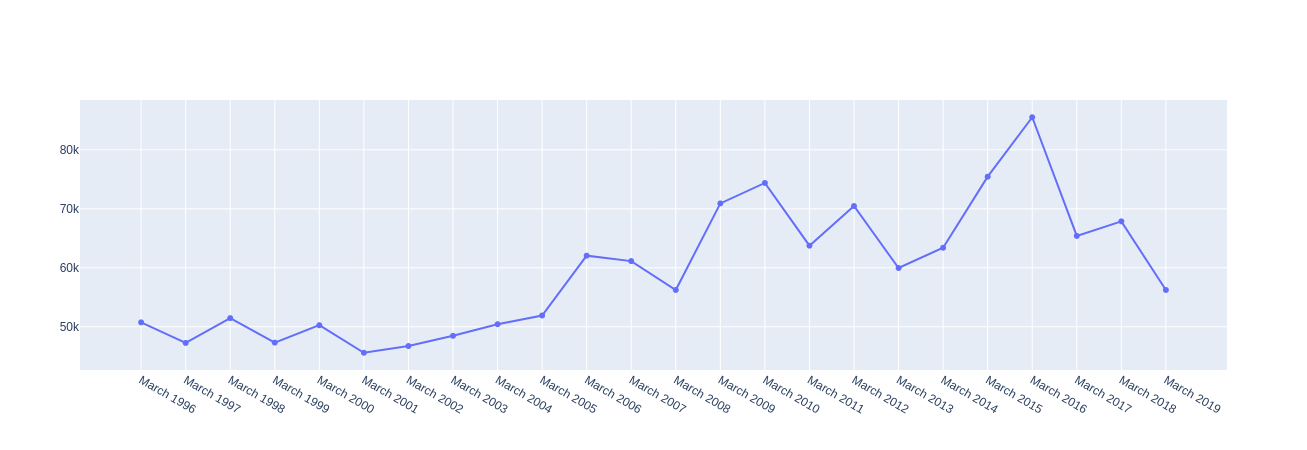

In [5]:
fig = go.Figure(data=go.Scatter(x=df["Date"], y=df["North East"], mode="lines+markers"))
iplot(fig)

# Annotate the plot

To put text labels alongside the markers, we can change `mode` parameter to `lines+markers+text`. That way, we can show whatever we provide in the `text` parameter. Also, we can specify where the text will be shown with the `textposition` parameter. If we don't provide the `textposition`, the deafult parameter will be `middle center` which will plot on the markers. For the sake of readability, we'll change it to `top center`. Let's put the number of jobs on `text` and change `mode` parameter. 

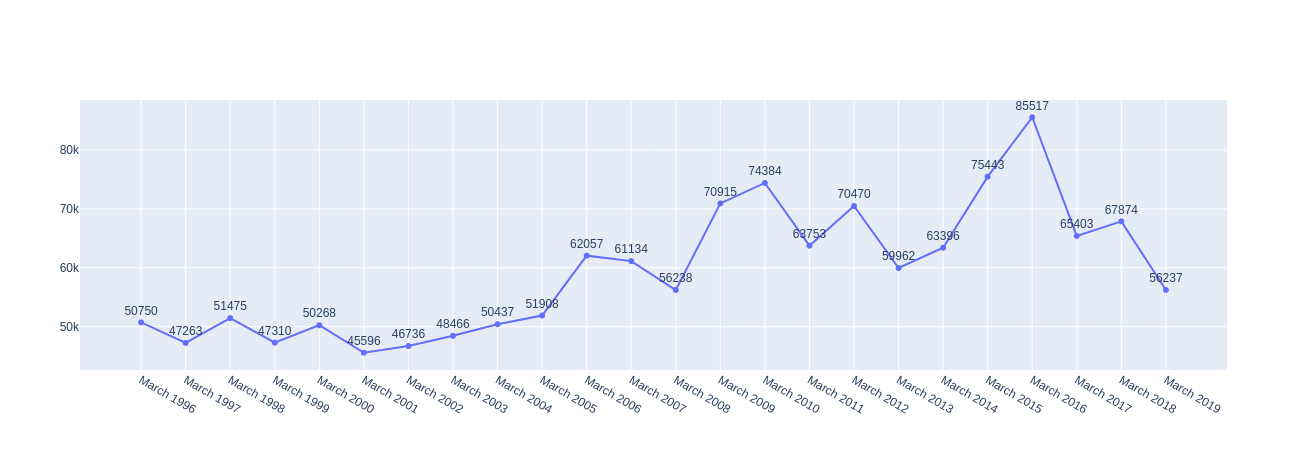

In [6]:
fig = go.Figure(
    data=go.Scatter(
        x=df["Date"],
        y=df["North East"],
        text=df["North East"],
        mode="lines+markers+text",
        textposition="top center",
    )
)
iplot(fig)

To annotate some values over the scatter plot, we can update the figure's layout by `update_layout` method where we can provide `annotation` property as a list of `Annotation` objects. 
For instance, we can annotate the minimum and maximum number of jobs in the North East by creating two annotations as follows.

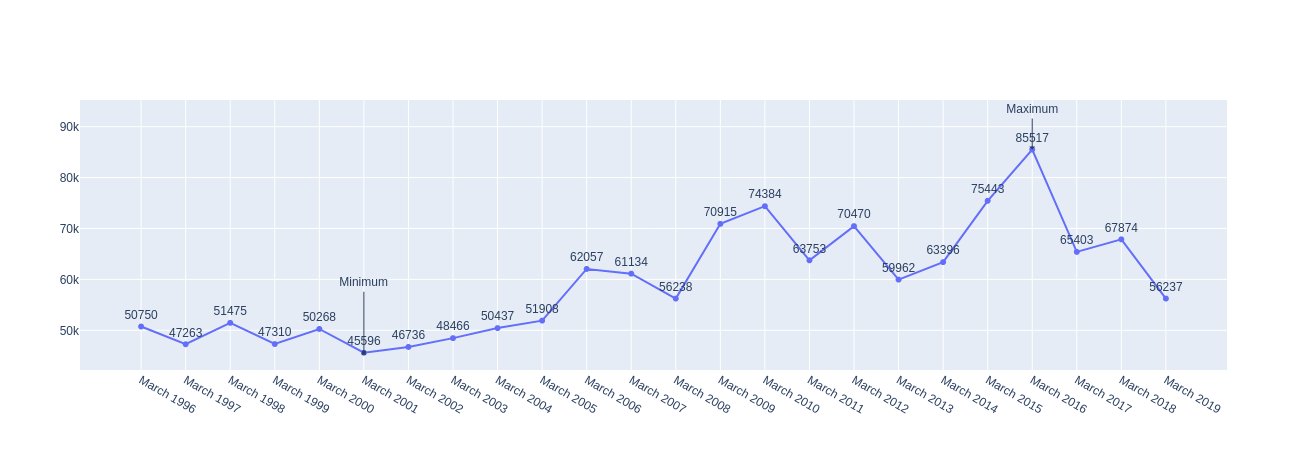

In [7]:
min_annotation = go.layout.Annotation(
    x=df["North East"].idxmin(),  # the index of the minimum value
    y=df["North East"].min(),  # minimum value of `North East` column
    text="Minimum",  # annotation text
    ay=-70,  # margin for annotation in y-axis
    ax=0,  # margin for annotation in x-axis
    showarrow=True,  # whether or not showing and arrow head
    arrowhead=7,  # change of arrow head, ranging from 0-8
)

max_annotation = go.layout.Annotation(
    x=df["North East"].idxmax(),  # the index of the maximum value
    y=df["North East"].max(),  # maximum value of `North East` column
    text="Maximum",  # annotation text
    ay=-40,  # margin for annotation in y-axis
    ax=0,  # margin for annotation in x-axis
    showarrow=True,  # whether or not showing and arrow head
    arrowhead=1,  # change of arrow head, ranging from 0-8
)

fig.update_layout(annotations=[min_annotation , max_annotation])
iplot(fig)

In [8]:
min_annotation = go.layout.Annotation(
    x=df["North East"].idxmin(),  # returns the index with of the minimum value
    y=df["North East"].min(),  # returns the minimum value
    text="Minimum Value",
    showarrow=True,
    arrowhead=3,  # arrowhead type, ranging 0-8
    ay=-100,  # margin in y axis for the annotation
)

max_annotation = go.layout.Annotation(
    x=df["North East"].idxmax(),  # returns the index with of the maximum value
    y=df["North East"].max(),  # returns the maximum value
    text="Maximum Value",
    showarrow=True,
    arrowhead=8,  # arrowhead type, ranging 0-8
    ay=-60,  # margin in y axis for the annotation
)
fig = go.Figure(
    data=go.Scatter(
        x=df["Date"],
        y=df["North East"],
        text=df["North East"],
        mode="lines+markers+text",
        textposition="top center",
    ),
    layout=go.Layout(annotations=[min_annotation, max_annotation]),
)

iplot(fig)

Let's add a title and axis labels to our plot. We can either update the layout of the figure, just like we did above, or we can specify `layout` property when we define the `Figure` object, like below:

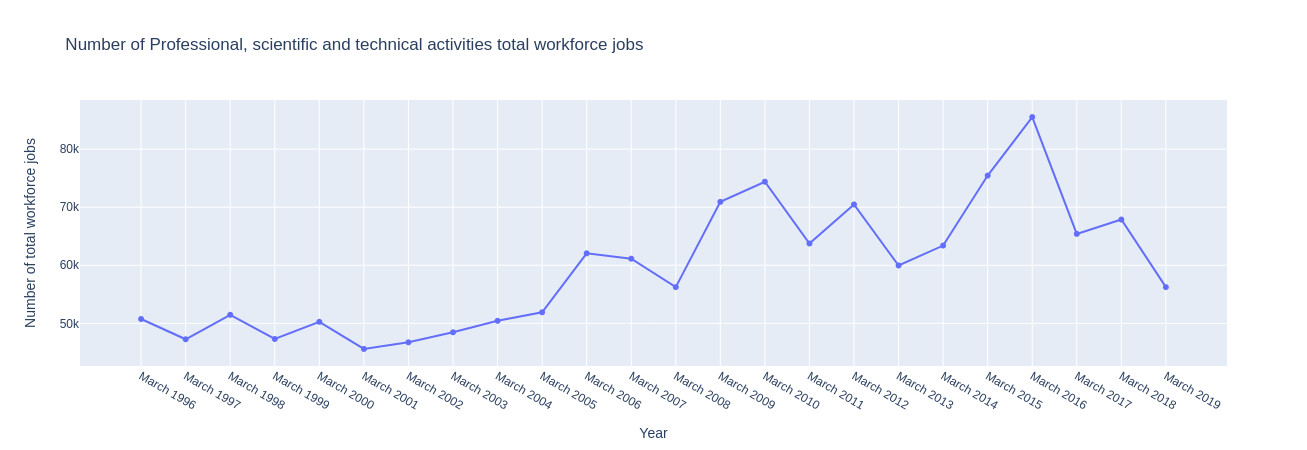

In [9]:
fig = go.Figure(
    data=go.Scatter(
        x=df["Date"], y=df["North East"], text=df["North East"], mode="lines+markers"
    ),
    layout=go.Layout(
        title="Number of Professional, scientific and technical activities total workforce jobs",
        xaxis_title="Year",
        yaxis_title="Number of total workforce jobs",
    ),
)
iplot(fig)

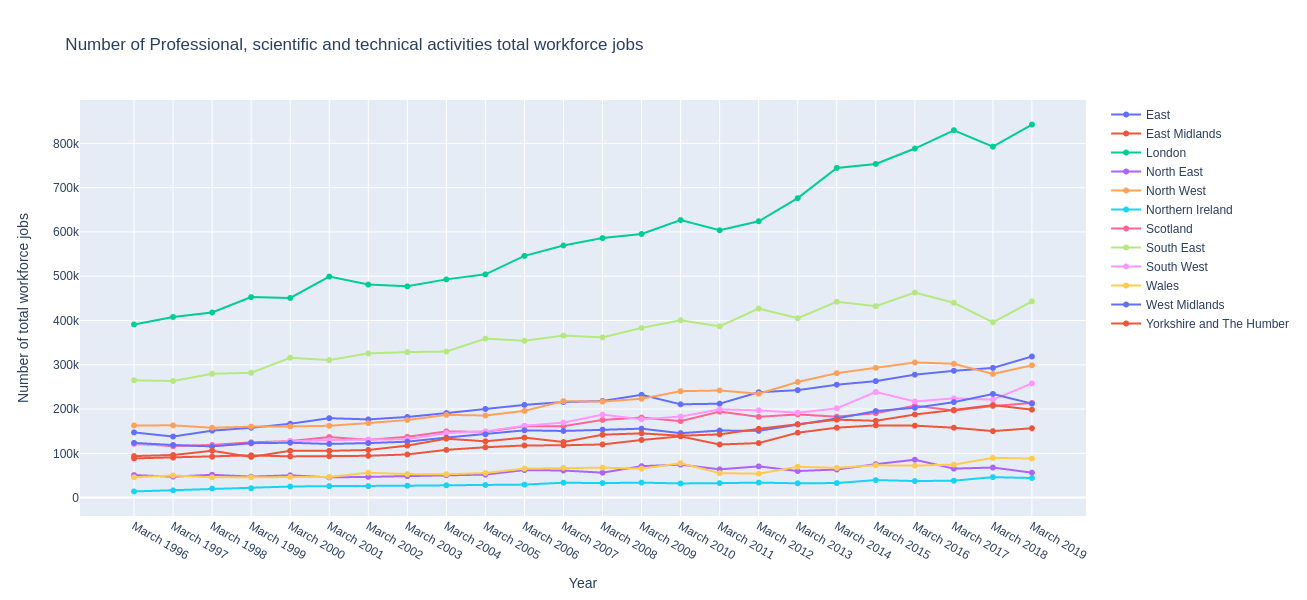

In [10]:
# note that we don't provide anything to the data property. We'll add them later.
fig = go.Figure(
    layout=go.Layout(
        title="Number of Professional, scientific and technical activities total workforce jobs",
        xaxis_title="Year",
        yaxis_title="Number of total workforce jobs",
        width=1000,
        height=600
    )
)

for col in df.columns[1:]:  # here col represents the column name
    fig.add_trace(go.Scatter(x=df["Date"], y=df[col], mode="lines+markers", name=col))


iplot(fig)